In [137]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [138]:
ATTACK_TARGET = "12"
TARGET_TYPE = "SUB" # MAIN: „É°„Ç§„É≥„ÅÆÊîªÊíÉ, SUB: ‰∫àÂÇôÈÅ∏„ÅÆÊîªÊíÉ, UTIL100: Utility100„ÅÆÊîªÊíÉ
# MAIN = False # True: „É°„Ç§„É≥„ÅÆÊîªÊíÉ, False: ‰∫àÂÇôÈÅ∏„ÅÆÊîªÊíÉ

DIR = ""
if TARGET_TYPE == "MAIN":
    DIR = "../data"
elif TARGET_TYPE == "SUB":
    DIR = "../predata/anonymization_data"
elif TARGET_TYPE == "UTIL100":
    DIR = "../samples/util100"
    ATTACK_TARGET = "36"

"""
01	ÂÆÆÂú∞Á†î.exe
02	ÁßÅÈÅîÊó•Êú¨Ë™ûÊú¨ÂΩì‰∏ãÊâã
03	„Éù„ÉÉ„Éó„Ç≥„Éº„É≥
04	Hots
05	SHA-NES
06	Á•û„ÅºÂ§ßŒΩœÑœÑ
07	„Åü„Åë„ÅÆ„ÅìÊò†ÁîªÂÆà„ÇäÈöä
08	0xA
09	„Çπ„ÉÜ„ÉÜ„Ç≥Ê≥•Ê£í
10	ÂãïÁöÑË®àÁîªÊ≥ï
11	Gunmataro117
12	HAL
14	privocy
15	ES5 ‚ÜíÂ§öÊï∞Ê±∫„ÅßÈô•ËêΩÔºü
16	‰ΩêÂè§Á†îÁ©∂ÂÆ§
17	„Åì„Åù„Å£„Å®„Ç¢„Çø„ÉÉ„ÇØ„ÄÅ„Åó„Çå„Å£„Å®„Éñ„É≠„ÉÉ„ÇØ
18	ÂåøÂêç„Ç¢„Éé„Éã„Éû„Çπ
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	Êò•Êó•ÈÉ®Èò≤Ë°õÈöäÔºà„Åã„Åô„Åã„ÅπÈò≤Ë°õÈöäÔºâ
"""

'\n01\tÂÆÆÂú∞Á†î.exe\n02\tÁßÅÈÅîÊó•Êú¨Ë™ûÊú¨ÂΩì‰∏ãÊâã\n03\t„Éù„ÉÉ„Éó„Ç≥„Éº„É≥\n04\tHots\n05\tSHA-NES\n06\tÁ•û„ÅºÂ§ßŒΩœÑœÑ\n07\t„Åü„Åë„ÅÆ„ÅìÊò†ÁîªÂÆà„ÇäÈöä\n08\t0xA\n09\t„Çπ„ÉÜ„ÉÜ„Ç≥Ê≥•Ê£í\n10\tÂãïÁöÑË®àÁîªÊ≥ï\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 ‚ÜíÂ§öÊï∞Ê±∫„ÅßÈô•ËêΩÔºü\n16\t‰ΩêÂè§Á†îÁ©∂ÂÆ§\n17\t„Åì„Åù„Å£„Å®„Ç¢„Çø„ÉÉ„ÇØ„ÄÅ„Åó„Çå„Å£„Å®„Éñ„É≠„ÉÉ„ÇØ\n18\tÂåøÂêç„Ç¢„Éé„Éã„Éû„Çπ\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\tÊò•Êó•ÈÉ®Èò≤Ë°õÈöäÔºà„Åã„Åô„Åã„ÅπÈò≤Ë°õÈöäÔºâ\n'

In [139]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### C„Éá„Éº„Çø„ÅÆË™≠„ÅøÂèñ„Çä

In [140]:
from os import listdir

#c0~c9„Å´ÂØæ„Åô„Çãdf„ÅÆ„É™„Çπ„Éà
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

Gender  Age  Occupation  ZIP-code  260  653  1525  2105  2193  2253  \
0         M   18           0       322    4    2     0     4     4     5   
1         M   18           9       103    1    0     0     4     0     5   
2         F   35           4       181    5    0     1     5     0     2   
3         M   56           4       459    4    4     2     2     4     1   
4         F    1           2       652    3    1     0     3     3     5   
...     ...  ...         ...       ...  ...  ...   ...   ...   ...   ...   
9995      M   35          12       652    5    0     0     4     3     0   
9996      F   50          10       380    5    4     1     2     5     0   
9997      M   25          16       495    1    1     0     2     0     4   
9998      F   50          10       943    4    4     3     0     1     1   
9999      M   50          11       282    4    1     0     3     1     5   

      2628  2872  3438  3439  3440  3877  3889  
0        5     0     0     2     0     2     2  
1        3     1     4     1     2     1     3  
2        2     1     3     3     5     0     4  
3        4     2     4     3     2     1     4  
4        4     4     0     0     0     5     0  
...    ...   ...   ...   ...   ...   ...   ...  
9995     3     5     0     0     0     0     1  
9996     0     2     5     0     5     1     1  
9997     3     3     5     0     3     0     1  
9998     0     4     3     2     5     0     0  
9999     5     2     0     0     2     4     4  

[10000 rows x 17 columns]

### Ba, Bb„ÅÆË™≠„ÅøËæº„Åø

In [141]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

Name Gender  Age  Occupation  ZIP-code
0  Etienne Lovell      M   25           7       957
1   Julius Felipe      M    1          10       778
2   Jayne Winckle      F   50          18       772
3   Gaylor Spread      M   18          13       666
4  Jennifer Corse      F   25           4       197

In [142]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

2 56  247  260  653 673 810  885 1009  1073  ... 2968 3393 3438  3439 3440  \
0  5  1    0    2    1   1   4    1    2     4  ...    5    0    0     2    0   
1  1  0    5    5    0   2   0    2    2     1  ...    0    5    1     5    5   
2  3  0    0    1    2   1   1    5    1     1  ...    2    0    3     5    0   
3  2  0    0    4    5   4   0    5    4     1  ...    *    5    5     1    5   
4  0  0    0    5    4   0   0    2    0     5  ...    2    0    4     0    2   

  3466 3479 3489 3877 3889  
0    4    0    3    3    1  
1    4    2    0    1    5  
2    4    4    3    1    5  
3    5    2    2    5    0  
4    0    0    2    3    0  

[5 rows x 46 columns]

### ÊîªÊíÉ„Å´Âà©Áî®„Åô„ÇãGAOZ„Å®Êò†Áîª„ÅÆID„ÅÆÂÖ®„Éö„Ç¢

In [143]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"„Éö„Ç¢„ÅÆÊï∞: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

„Éö„Ç¢„ÅÆÊï∞: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9„ÅÆÂêÑcrossÈõÜË®à„ÅÆÂπ≥Âùá„Çí„Å®„Çã

In [144]:
# 1. c0„Åã„Çâc9„Åæ„Åß„ÅÆ„Éá„Éº„Çø„ÇíÁµêÂêà
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairs„Åî„Å®„Å´„ÇØ„É≠„ÇπÈõÜË®à„ÇíË°å„ÅÜ
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174       0       1       2       3       4       5
260                                                 
0     0.0194  0.0124  0.0125  0.0170  0.0198  0.0104
1     0.0285  0.0159  0.0187  0.0209  0.0283  0.0174
2     0.0201  0.0126  0.0165  0.0177  0.0197  0.0123
3     0.0320  0.0215  0.0286  0.0282  0.0297  0.0201
4     0.0326  0.0212  0.0242  0.0291  0.0338  0.0180
5     0.0749  0.0528  0.0550  0.0620  0.0726  0.0436

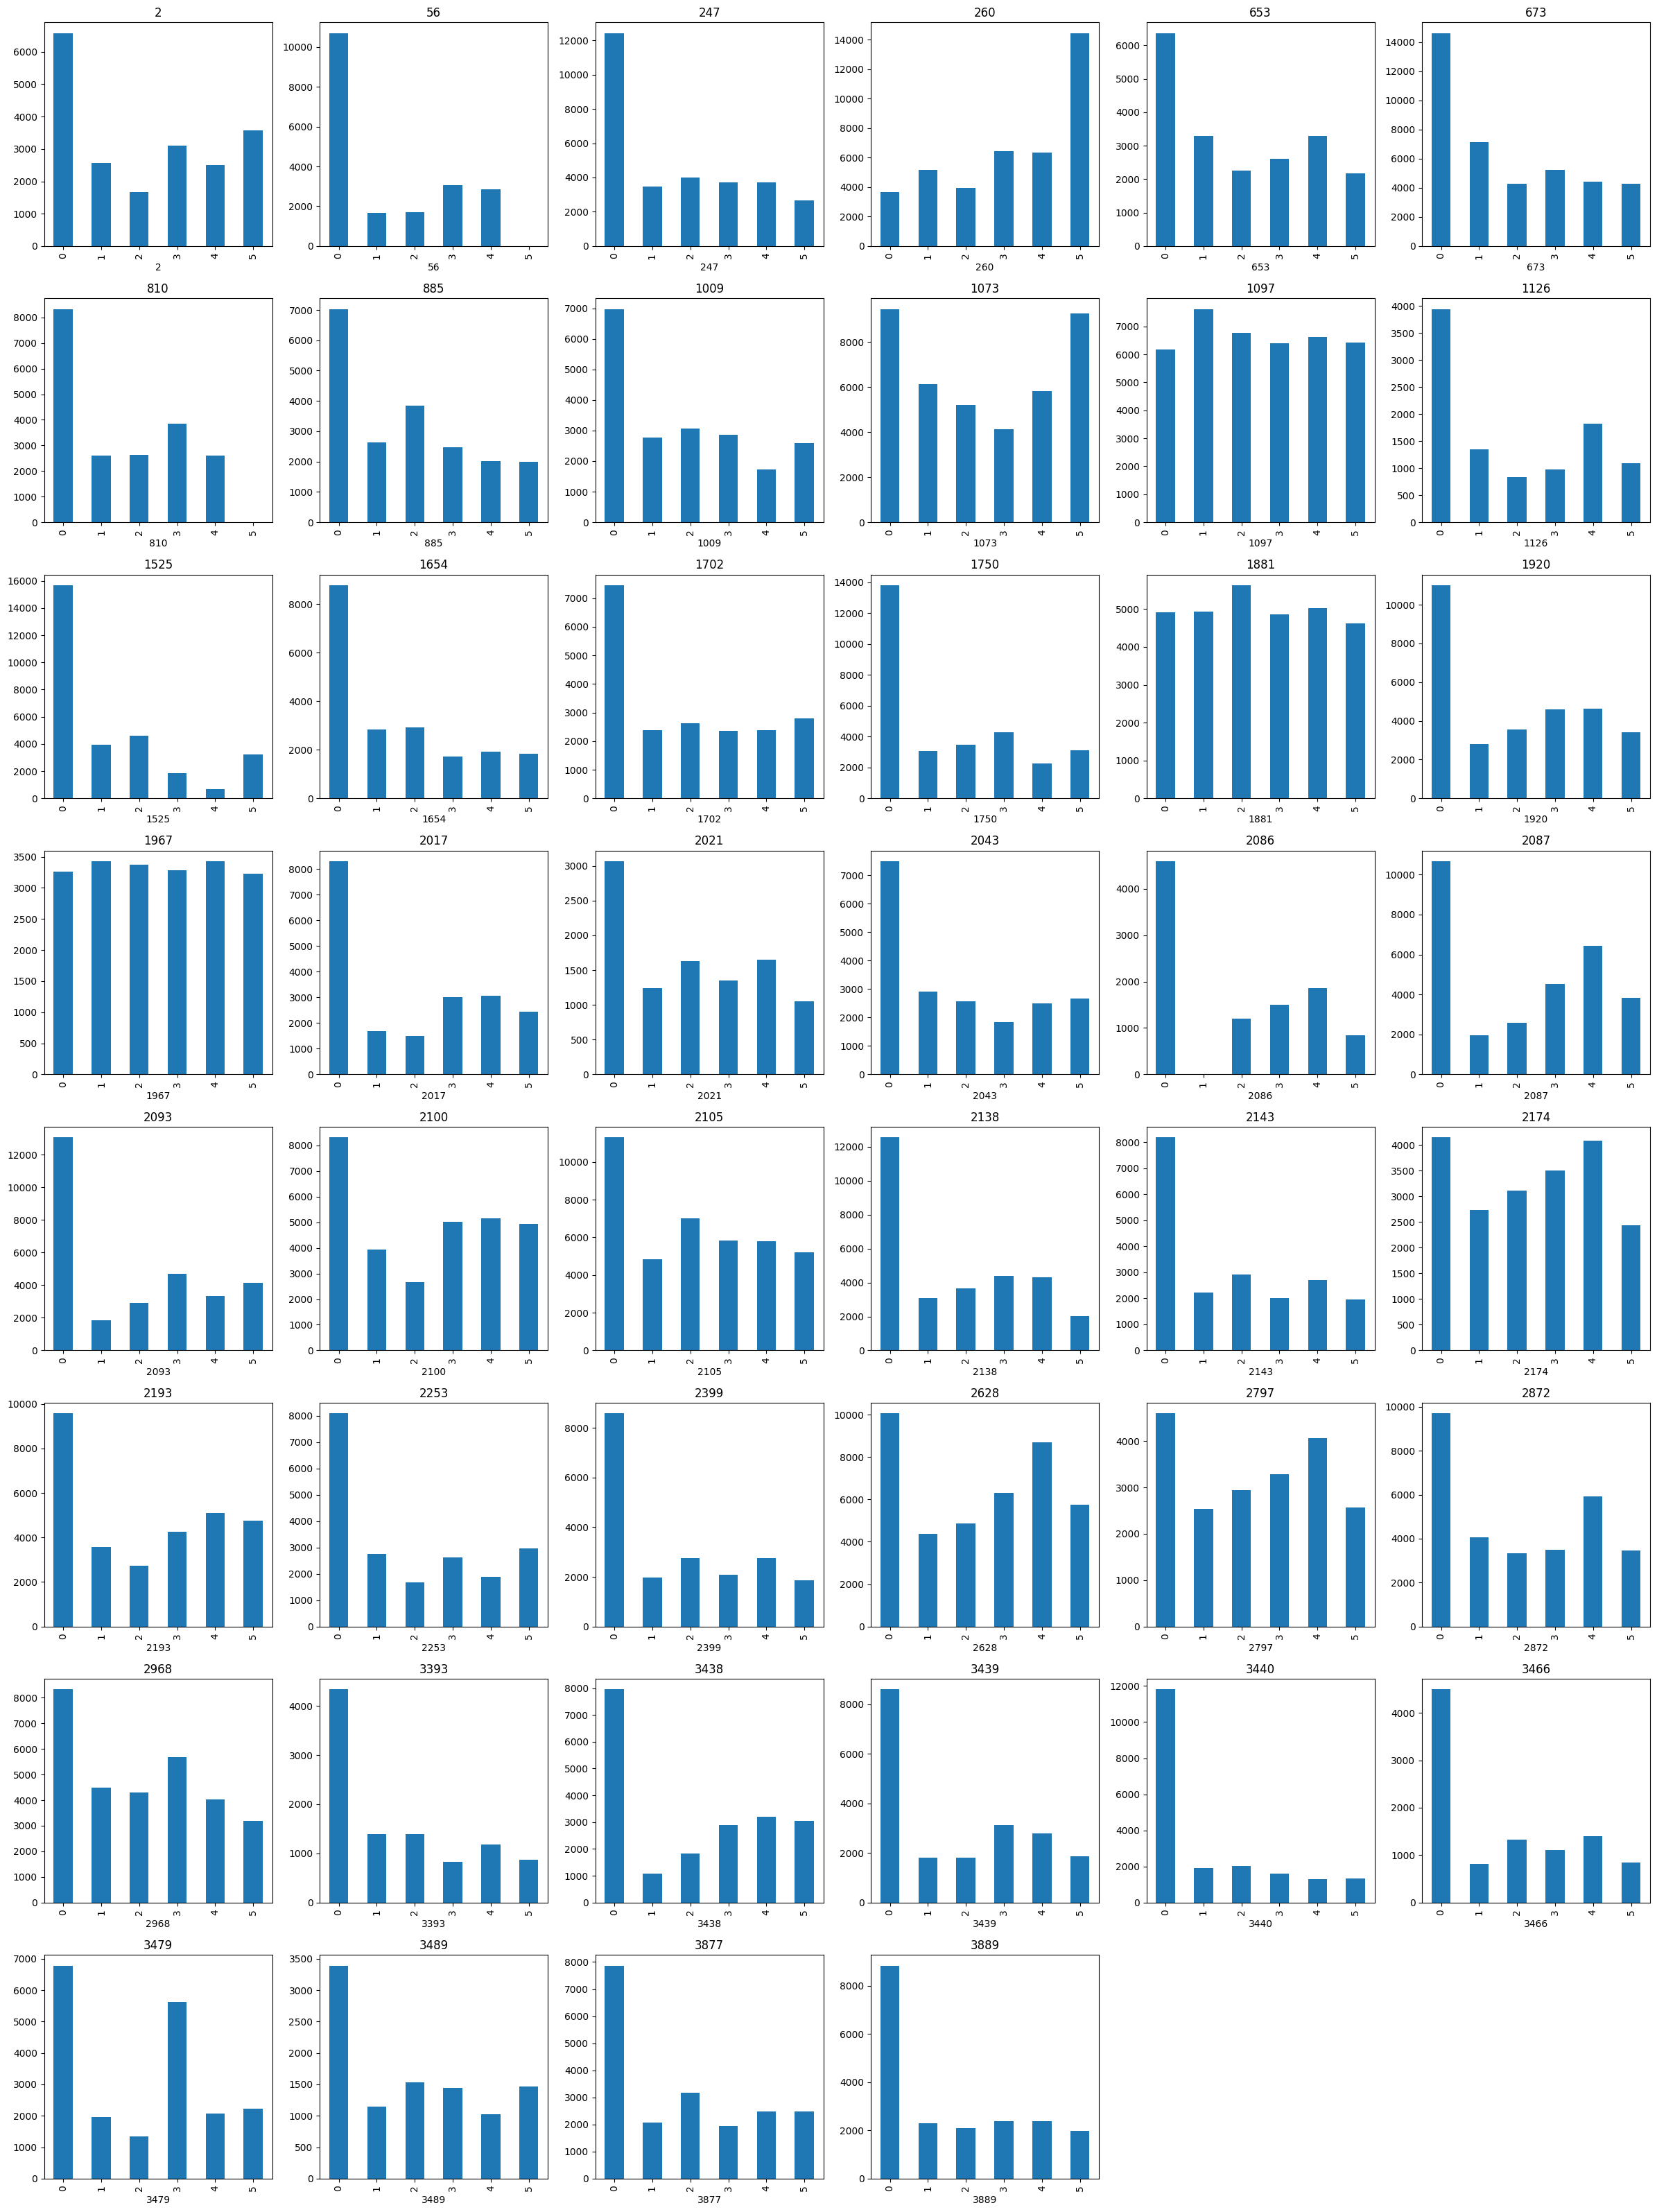

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_data„ÅåÊó¢„Å´ÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Çã„Å®‰ªÆÂÆö„Åó„Åæ„Åô

# „Ç´„É©„É†„ÅÆÁ∑èÊï∞„ÇíÂèñÂæó
num_cols = len(MOVIE_IDS)
# ÂàóÊï∞„Çí6„Å´Ë®≠ÂÆö
num_per_row = 6
# ÂøÖË¶Å„Å™Ë°åÊï∞„ÇíË®àÁÆó
num_rows = int(np.ceil(num_cols / num_per_row))

# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„Çí‰ΩúÊàê
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # ÂêÑ„Ç´„É©„É†„Å´ÂØæ„Åó„Å¶Ê£í„Ç∞„É©„Éï„ÇíÊèèÁîª
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# ‰Ωô„Å£„Åü„Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÇíÂâäÈô§
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Ê≠£Ë¶è„ÅÆMAE ATTACK

In [146]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:„ÄÄ„Åì„Åì„ÅÆÂÆüË£Ö„ÅåË§áÈõë„Å™„ÅÆ„ÅßÂæå„Åª„Å©ÂïèÈ°å„Å™„ÅÑ„ÅãÁ¢∫Ë™ç„Åô„Çã
    # ÂêÑÊò†ÁîªID„Å´ÂØæ„Åô„Çã target_cross „ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # Ëª¢ÁΩÆ„Åô„Çã
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # Ê≠£Ë¶èÂåñ‰øÇÊï∞„ÇíË®àÁÆóÔºàÁõÆÊ®ôÂÄ§ 1/6 „ÇíÂêÑÂàó„ÅÆÂêàË®à„ÅßÂâ≤„ÇãÔºâ
        normalization_factors = (1/6) / column_sums
        # „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÂêÑÂÄ§„Å´Ê≠£Ë¶èÂåñ‰øÇÊï∞„ÇíÈÅ©Áî®
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # ÂêÑ„Ç´„É©„É†„Åî„Å®„Å´Á∑èÂíå„Åå1„Å´„Å™„Çã„Çà„ÅÜ„Å´Á¢∫Áéá„ÇíÊ≠£Ë¶èÂåñ
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÇíÂàó„Åî„Å®„Å´Ê≠£Ë¶èÂåñ
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([5, 1, 2, 2, 0, 3, 5, 0, 0, 0, 0, 2, 4, 3, 2, 0, 0, 1, 2, 1, 1, 0,
       4, 0, 0, 5, 4, 4, 0, 2, 2, 4, 4, 0, 2, 0, 3, 2, 5, 5, 3, 4, 5, 3,
       4, 0, 1, 2, 0, 4])

In [147]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5, 1, 2, 2, 0, 3, 5, 0, 0, 0, 0, 2, 4, 3, 2, 0, 0, 1, 2, 1, 1, 0, 4, 0, 0, 5, 4, 4, 0, 2, 2, 4, 4, 0, 2, 0, 3, 2, 5, 5, 3, 4, 5, 3, 4, 0, 1, 2, 0, 4]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>20</span> / 50

In [148]:
count_0 = my_answer.count(0)

printmd(f"0„ÅÆÊï∞: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"üö® <span style='color:yellow'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>")

0„ÅÆÊï∞: <span style='color:green'>15</span>

## MAE ATTACK + „Ç¥„ÉüÊñπÂºè

In [149]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

prob_0 = []
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:„ÄÄ„Åì„Åì„ÅÆÂÆüË£Ö„ÅåË§áÈõë„Å™„ÅÆ„ÅßÂæå„Åª„Å©ÂïèÈ°å„Å™„ÅÑ„ÅãÁ¢∫Ë™ç„Åô„Çã
    # ÂêÑÊò†ÁîªID„Å´ÂØæ„Åô„Çã target_cross „ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # Ëª¢ÁΩÆ„Åô„Çã
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # Ê≠£Ë¶èÂåñ‰øÇÊï∞„ÇíË®àÁÆóÔºàÁõÆÊ®ôÂÄ§ 1/6 „ÇíÂêÑÂàó„ÅÆÂêàË®à„ÅßÂâ≤„ÇãÔºâ
        normalization_factors = (1/6) / column_sums
        # „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÂêÑÂÄ§„Å´Ê≠£Ë¶èÂåñ‰øÇÊï∞„ÇíÈÅ©Áî®
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # ÂêÑ„Ç´„É©„É†„Åî„Å®„Å´Á∑èÂíå„Åå1„Å´„Å™„Çã„Çà„ÅÜ„Å´Á¢∫Áéá„ÇíÊ≠£Ë¶èÂåñ
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÇíÂàó„Åî„Å®„Å´Ê≠£Ë¶èÂåñ
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    
    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Prob„ÅÆ‰∏ä‰ΩçMAX_0_COUNT„ÇíÊ±Ç„ÇÅ„Çã
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0„ÇíË®≠ÂÆö
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answer„ÇíÊ±∫ÂÆö
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([5, 0, 2, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0,
       4, 0, 0, 5, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 0, 3,
       4, 0, 1, 2, 0, 4])

In [150]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5, 0, 2, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 4, 0, 0, 5, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 0, 3, 4, 0, 1, 2, 0, 4]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>20</span> / 50

In [151]:
count_0 = my_answer.count(0)

printmd(f"0„ÅÆÊï∞: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"üö® <span style='color:yellow'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>")

0„ÅÆÊï∞: <span style='color:green'>28</span>

## „Ç¥„ÉüÊñπÂºè„Çí„Ç¨„ÉÅ„Åß„É©„É≥„ÉÄ„É†„Åß„ÇÑ„Å£„Åü„Çâ„Å©„ÅÜ„Å™„Çã„ÅÆ„ÅãË™øÊüª

In [152]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>{matched_count}</span> / 50")

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[3, 0, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 5, 0, 0, 0, 0, 5, 1, 1, 0, 4, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 4, 1, 3, 0, 0, 4, 0, 3]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>15</span> / 50

### „Éô„Ç§„Ç∫Êé®ÂÆö„ÇíÂà©Áî®„Åó„ÅüÁ©¥Âüã„ÇÅ

In [153]:
def grade_predictions(result_list, method_name):
    from IPython.display import Markdown, display

    def printmd(string):
        display(Markdown(string))

    # 0 „ÅÆÊï∞„Çí„Ç´„Ç¶„É≥„Éà
    count_0 = result_list.count(0)
    printmd(f"**{method_name} „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**")
    printmd(f"0„ÅÆÊï∞: <span style='color:green'>{count_0}</span>")
    if count_0 >= 30:
        printmd(f"üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>")

    # Ê≠£Ëß£„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
    # DIR „Å® ATTACK_TARGET „ÅØÈÅ©Âàá„Å´ÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Å®„Åó„Åæ„Åô
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values
    
    print(X_ANSWER)
    print(np.array(result_list))

    # ‰∫àÊ∏¨ÁµêÊûú„Å®Ê≠£Ëß£„Éá„Éº„Çø„ÇíÊØîËºÉ
    matched_count = sum([1 for i in range(len(result_list)) if result_list[i] == X_ANSWER[i]])
    # ÁµêÊûú„ÇíË°®Á§∫
    printmd(f"„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>{matched_count}</span> / {len(result_list)}")
    print("\n")

In [154]:
# Êó¢Â≠ò„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®„Çí‰ΩøÁî®„Åô„Çã„Åã„ÄÅÊñ∞„Åü„Å´‰ΩúÊàê
# Êò†Áîª„Åî„Å®„ÅÆË©ï‰æ°ÂÄ§„ÅÆÂàÜÂ∏É„ÇíË®àÁÆóÔºà‰∫ãÂâçÁ¢∫ÁéáÔºâ
rating_priors = {}
for movie_id in MOVIE_IDS:
    rating_counts = combined_data[movie_id].value_counts(normalize=True).sort_index()
    rating_priors[movie_id] = rating_counts

# Êò†Áîª„ÅÆ„Éö„Ç¢„Åî„Å®„Å´„ÇØ„É≠„ÇπÈõÜË®àË°®„Çí‰ΩúÊàê„Åó„ÄÅP(Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ° | Ê¨†Êêç„Åó„ÅüË©ï‰æ°)„ÇíË®àÁÆó
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='columns')
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='index')
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j])
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

In [155]:
# „Éá„Éê„ÉÉ„Ç∞Áî®„ÅÆË°åÁï™Âè∑
target_Bb_row_index = 2

# Bb„ÅÆÊåáÂÆö„Åó„Åü„É¶„Éº„Ç∂„Éº„Å´ÂØæ„Åó„Å¶„ÄÅÊ¨†Êêç„Åó„ÅüË©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨
target_Bb_row = Bb.iloc[target_Bb_row_index]

# Ê¨†Êêç„Åó„ÅüÊò†ÁîªID„ÇíÁâπÂÆö
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break

print(f"Ê¨†Êêç„Åó„ÅüÊò†ÁîªIDÔºö{hidden_movie_id}\n")

# Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„ÇíÂèéÈõÜ
observed_ratings = {}
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§Ôºö{observed_ratings}\n")

for movie_id_i, movie_id_j in cross_tab_pairs:
    if movie_id_i == hidden_movie_id or movie_id_j == hidden_movie_id:
        print(cross_tabs[(movie_id_i, movie_id_j)])
        break

Ê¨†Êêç„Åó„ÅüÊò†ÁîªIDÔºö1525

Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§Ôºö{'2': 3, '56': 0, '247': 0, '260': 1, '653': 2, '673': 1, '810': 1, '885': 5, '1009': 1, '1073': 1, '1097': 2, '1126': 0, '1654': 2, '1702': 1, '1750': 0, '1881': 5, '1920': 4, '1967': 5, '2017': 0, '2021': 1, '2043': 0, '2086': 4, '2087': 1, '2093': 1, '2100': 0, '2105': 2, '2138': 4, '2143': 4, '2174': 3, '2193': 2, '2253': 2, '2399': 2, '2628': 4, '2797': 2, '2872': 3, '2968': 2, '3393': 0, '3438': 3, '3439': 5, '3440': 0, '3466': 4, '3479': 4, '3489': 3, '3877': 1, '3889': 5}

1525     0    1    2    3    4    5
2                                  
0     3569  863  945  383  140  680
1     1295  302  425  149   59  331
2      845  235  251  111   44  183
3     1607  420  494  222   59  310
4     1246  378  408  165   49  267
5     1894  446  544  207   96  378


In [156]:
# Ê¨†Êêç„Åó„ÅüË©ï‰æ°ÂÄ§„ÅÆ‰∫ãÂæåÁ¢∫Áéá„ÇíË®àÁÆó
log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # „É©„Éó„É©„Çπ„Çπ„É†„Éº„Ç∏„É≥„Ç∞
print(f"ÂàùÊúü„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºà‰∫ãÂâçÁ¢∫Áéá„ÅÆÂØæÊï∞ÔºâÔºö\n{log_posterior}\n")

# ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„Å¶Ê≠£Ë¶èÂåñÔºà„ÅÑ„Çâ„Å™„ÅÑÔºâ
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"ÂàùÊúü„ÅÆÊ≠£Ë¶èÂåñ‰∫ãÂæåÁ¢∫Áéá\n{posterior}\n")

ÂàùÊúü„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºà‰∫ãÂâçÁ¢∫Áéá„ÅÆÂØæÊï∞ÔºâÔºö
1525
0   -0.648556
1   -2.023944
2   -1.874489
3   -2.782774
4   -3.803168
5   -2.230574
Name: proportion, dtype: float64

ÂàùÊúü„ÅÆÊ≠£Ë¶èÂåñ‰∫ãÂæåÁ¢∫Áéá
1525
0    0.522800
1    0.132133
2    0.153433
3    0.061867
4    0.022300
5    0.107467
Name: proportion, dtype: float64



In [157]:
# ÂêÑË¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„Å´„Å§„ÅÑ„Å¶ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÇíÊõ¥Êñ∞
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"MovieIDÔºö{observed_movie_id}, Ë©ï‰æ°ÂÄ§Ôºö{observed_rating}")

    # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÇíÂèñÂæó
    if (hidden_movie_id, observed_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
    elif (observed_movie_id, hidden_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)]
        cross_tab = cross_tab.T  # Ëª¢ÁΩÆ
    else:
        print("„ÇØ„É≠„ÇπÈõÜË®àË°®„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ„Çπ„Ç≠„ÉÉ„Éó„Åó„Åæ„Åô„ÄÇ\n")
        continue
    print(f"Ê≠£Ë¶èÂåñÂâç„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö\n{cross_tab}\n")
    # Ê≠£Ë¶èÂåñÔºàË°åÊñπÂêë„Å´Ê≠£Ë¶èÂåñ„Åó„Å¶ P(Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ | Èö†„Çå„ÅüË©ï‰æ°ÂÄ§) „ÇíÂæó„ÇãÔºâ
    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    print(f"Ê≠£Ë¶èÂåñÂæå„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö\n{cross_tab}\n")
    
    # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„Å´ÂØæ„Åô„ÇãÊù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂèñÂæó
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞

    print(f"Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá P(Rating={observed_rating} | Èö†„Çå„ÅüË©ï‰æ°ÂÄ§)Ôºö\n{P_observed_given_hidden}\n")

    # ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÇíÊõ¥Êñ∞
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"Êõ¥Êñ∞Âæå„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºö\n{log_posterior}\n")

# ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„ÄÅÊ≠£Ë¶èÂåñ
log_posterior -= log_posterior.max()  # „Ç™„Éº„Éê„Éº„Éï„É≠„ÉºÂØæÁ≠ñ
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"ÊúÄÁµÇÁöÑ„Å™‰∫ãÂæåÁ¢∫ÁéáÔºàÊ≠£Ë¶èÂåñÊ∏à„ÅøÔºâÔºö\n{posterior}\n")

# ‰∫ãÂæåÁ¢∫Áéá„ÅåÊúÄÂ§ß„ÅÆË©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨ÂÄ§„Å®„Åô„Çã
predicted_rating = posterior.idxmax()
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§Ôºö{predicted_rating}")

MovieIDÔºö2, Ë©ï‰æ°ÂÄ§Ôºö3
Ê≠£Ë¶èÂåñÂâç„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö
2        0     1    2     3     4     5
1525                                   
0     3569  1295  845  1607  1246  1894
1      863   302  235   420   378   446
2      945   425  251   494   408   544
3      383   149  111   222   165   207
4      140    59   44    59    49    96
5      680   331  183   310   267   378

Ê≠£Ë¶èÂåñÂæå„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö
2            0         1         2         3         4         5
1525                                                            
0     0.341335  0.123852  0.080815  0.153692  0.119166  0.181140
1     0.326399  0.114221  0.088880  0.158850  0.142965  0.168684
2     0.308119  0.138572  0.081839  0.161069  0.133029  0.177372
3     0.309620  0.120453  0.089733  0.179466  0.133387  0.167340
4     0.313199  0.131991  0.098434  0.131991  0.109620  0.214765
5     0.316426  0.154025  0.085156  0.144253  0.124244  0.175896

Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá P(Rating=3 | Èö†„Çå„ÅüË©ï‰æ°ÂÄ§)Ôºö
15

### ‰ª•‰∏ä„ÅÆÂá¶ÁêÜ„ÇíBb„ÅÆÂêÑË°å„Å´Ë°å„ÅÜ

In [158]:
# Bb„ÅÆÂêÑ„É¶„Éº„Ç∂„Éº„Å´ÂØæ„Åó„Å¶„ÄÅÊ¨†Êêç„Åó„ÅüË©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨
# result_list = []
posterior_list = []

for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # Ê¨†Êêç„Åó„ÅüÊò†ÁîªID„ÇíÁâπÂÆö
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    observed_ratings = {}
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])

    # Ê¨†Êêç„Åó„ÅüË©ï‰æ°ÂÄ§„ÅÆ‰∫ãÂæåÁ¢∫Áéá„ÇíË®àÁÆó
    log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # „É©„Éó„É©„Çπ„Çπ„É†„Éº„Ç∏„É≥„Ç∞

    for observed_movie_id, observed_rating in observed_ratings.items():
        # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÇíÂèñÂæó
        if (hidden_movie_id, observed_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
        elif (observed_movie_id, hidden_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)].T
        else:
            continue  # „ÇØ„É≠„ÇπÈõÜË®àË°®„Åå„Å™„ÅÑÂ†¥Âêà„ÅØ„Çπ„Ç≠„ÉÉ„Éó

        # Ë°åÊñπÂêë„ÅßÊ≠£Ë¶èÂåñ
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

        for rating in log_posterior.index:
            P_observed_given_hidden = cross_tab.get(observed_rating, pd.Series(1e-8, index=log_posterior.index)).get(rating, 1e-8)
            log_posterior[rating] += np.log(P_observed_given_hidden + 1e-8)  # „É©„Éó„É©„Çπ„Çπ„É†„Éº„Ç∏„É≥„Ç∞

    # ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„ÄÅÊ≠£Ë¶èÂåñ
    log_posterior -= log_posterior.max()  # „Ç™„Éº„Éê„Éº„Éï„É≠„ÉºÂØæÁ≠ñ
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    print(posterior)
    posterior_series = pd.Series(posterior, index=log_posterior.index)

    # ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ posterior „Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò
    posterior_list.append(posterior_series)



2193
0    0.100059
1    0.121195
2    0.053696
3    0.122040
4    0.160402
5    0.442608
Name: proportion, dtype: float64
1967
0    0.140526
1    0.238047
2    0.199406
3    0.162920
4    0.095749
5    0.163353
Name: proportion, dtype: float64
1525
0    0.099230
1    0.115945
2    0.527320
3    0.117218
4    0.023355
5    0.116931
Name: proportion, dtype: float64
2968
0    0.117651
1    0.101557
2    0.331386
3    0.146115
4    0.166389
5    0.136902
Name: proportion, dtype: float64
2043
0    0.660638
1    0.049063
2    0.081678
3    0.036776
4    0.016360
5    0.155485
Name: proportion, dtype: float64
56
0     4.295308e-02
1     9.605905e-02
2     4.054581e-02
3     6.850248e-01
4     1.354172e-01
5    2.489685e-242
Name: proportion, dtype: float64
2093
0    0.203364
1    0.115926
2    0.161871
3    0.056406
4    0.054029
5    0.408403
Name: proportion, dtype: float64
3489
0    0.677545
1    0.049299
2    0.065206
3    0.060234
4    0.094551
5    0.053165
Name: proportion, dtype: floa

In [159]:
# ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ„Çº„É≠„ÅÆÁ¢∫Áéá„ÇíÂèñÂæó
zero_probabilities = []
for idx, posterior_series in enumerate(posterior_list):
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# „Çº„É≠„ÅÆÁ¢∫Áéá„ÅåÈ´ò„ÅÑÈ†Ü„Å´‰∏¶„ÅπÊõø„Åà
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0„Å´Á¢∫ÂÆö„Åô„Çã„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæóÔºàÊúÄÂ§ß30ÂÄãÔºâ
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# ‰∫àÊ∏¨ÁµêÊûú„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
result_list = []

for idx in range(len(Bb)):
    posterior_series = posterior_list[idx]

    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0‰ª•Â§ñ„ÅßÊúÄÂ§ß„ÅÆ‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨ÂÄ§„Å®„Åô„Çã
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            # 0‰ª•Â§ñ„ÅÆË©ï‰æ°ÂÄ§„Åå„Å™„ÅÑÂ†¥Âêà„ÅØ0„Çí‰∫àÊ∏¨
            predicted_rating = 0
    result_list.append(int(predicted_rating))

# ÁµêÊûú„ÇíË°®Á§∫
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂà∂Á¥Ñ„ÇíÈÅ©Áî®ÔºâÔºö\n{result_list}")

‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂà∂Á¥Ñ„ÇíÈÅ©Áî®ÔºâÔºö
[5, 1, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 5, 4, 0, 4, 0, 0, 5, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 3, 2, 0, 0, 3, 0, 1, 5, 0, 0, 0, 2, 0, 0]


In [160]:
# ÁµêÊûú„ÇíË°®Á§∫
grade_predictions(result_list, "c_data„ÇíÁµêÂêà„Åó„Å¶„Éô„Ç§„Ç∫Êé®ÂÆö")

**c_data„ÇíÁµêÂêà„Åó„Å¶„Éô„Ç§„Ç∫Êé®ÂÆö „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**

0„ÅÆÊï∞: <span style='color:green'>30</span>

üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 2 2 0 3 0 0 0 0 0 0 0 0 2 0 0 0 1 5 4 0 4 0 0 5 0 0 0 2 0 2 0 0 2 0 3
 2 0 0 3 0 1 5 0 0 0 2 0 0]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>20</span> / 50

### „Ç∏„É£„É≥„É´ÂàÜ„Åë„ÇíÂà©Áî®„Åô„Çå„Å∞„ÄÅ0„Å´ÂÅè„ÇãÂïèÈ°å„ÇíÁ∑©Âíå„Åß„Åç„Å™„ÅÑ„Åã

In [161]:
target_Bb_row_index = 0  # „Éá„Éê„ÉÉ„Ç∞„Åó„Åü„ÅÑ„É¶„Éº„Ç∂„Éº„ÅÆË°åÁï™Âè∑
target_Bb_row = Bb.iloc[target_Bb_row_index]

hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
print(f"„É¶„Éº„Ç∂„Éº {target_Bb_row_index} „ÅÆÊ¨†Êêç„Åó„ÅüÊò†ÁîªIDÔºö{hidden_movie_id}")

„É¶„Éº„Ç∂„Éº 0 „ÅÆÊ¨†Êêç„Åó„ÅüÊò†ÁîªIDÔºö2193


In [162]:
genres_with_hidden_movie = []
for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
    if hidden_movie_id in genre_movie_ids:
        genres_with_hidden_movie.append((idx, genre_movie_ids))

if not genres_with_hidden_movie:
    print(f"Ê¨†Êêç„Åó„ÅüÊò†ÁîªID {hidden_movie_id} „ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ")
else:
    # „Ç´„É©„É†Êï∞„ÅåÊúÄ„ÇÇÂ§ö„ÅÑ„Ç∏„É£„É≥„É´„ÇíÈÅ∏Êäû
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    print(f"ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºö{selected_genre_idx}")
    print(f"ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆÊò†ÁîªID„É™„Çπ„ÉàÔºö{selected_genre_movie_ids}")

ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºö1
ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆÊò†ÁîªID„É™„Çπ„ÉàÔºö['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889']


In [163]:
# ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆ„Éá„Éº„Çø„ÇíÂèñÂæó
selected_genre_df = c_data_list[selected_genre_idx]

# ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆÊò†ÁîªID„É™„Çπ„Éà
selected_movie_ids = selected_genre_movie_ids.copy()

observed_ratings = {}
for movie_id in selected_movie_ids:
    if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§Ôºö{observed_ratings}")


Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§Ôºö{'2': 5, '56': 1, '260': 2, '653': 1, '673': 1, '1009': 2, '1073': 4, '1525': 4, '1750': 2, '1881': 4, '1967': 2, '2043': 2, '2093': 2, '2105': 4, '2143': 0, '2399': 2, '2628': 4, '2968': 5, '3479': 0, '3489': 3, '3877': 3, '3889': 1}


In [164]:
rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞
log_posterior = np.log(rating_priors)
print(f"ÂàùÊúü„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºà‰∫ãÂâçÁ¢∫Áéá„ÅÆÂØæÊï∞ÔºâÔºö\n{log_posterior}")

# ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„Å¶Ê≠£Ë¶èÂåñÔºà„ÅÑ„Çâ„Å™„ÅÑÔºâ
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"ÂàùÊúü„ÅÆÊ≠£Ë¶èÂåñ‰∫ãÂæåÁ¢∫Áéá\n{posterior}\n")

ÂàùÊúü„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºà‰∫ãÂâçÁ¢∫Áéá„ÅÆÂØæÊï∞ÔºâÔºö
2193
0   -1.141311
1   -2.130314
2   -2.394700
3   -1.948413
4   -1.771957
5   -1.844527
Name: proportion, dtype: float64
ÂàùÊúü„ÅÆÊ≠£Ë¶èÂåñ‰∫ãÂæåÁ¢∫Áéá
2193
0    0.3194
1    0.1188
2    0.0912
3    0.1425
4    0.1700
5    0.1581
Name: proportion, dtype: float64



In [165]:
# „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàê„Å®ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÅÆÊõ¥Êñ∞
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"\nË¶≥Ê∏¨„Åï„Çå„ÅüÊò†ÁîªIDÔºö{observed_movie_id}, Ë©ï‰æ°ÂÄ§Ôºö{observed_rating}")

    # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàêÔºàÊ≠£Ë¶èÂåñ„ÅØÂæå„ÅßË°å„ÅÜÔºâ
    cross_tab = pd.crosstab(
        selected_genre_df[hidden_movie_id],
        selected_genre_df[observed_movie_id]
    )

    print(f"Ê≠£Ë¶èÂåñÂâç„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö\n{cross_tab}")

    # Ë°åÊñπÂêë„Å´Ê≠£Ë¶èÂåñ„Åó„Å¶Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂæó„Çã
    cross_tab = cross_tab.div(cross_tab.sum(axis=0), axis=1)

    print(f"Ê≠£Ë¶èÂåñÂæå„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö\n{cross_tab}")

    # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„Å´ÂØæ„Åô„ÇãÊù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂèñÂæó
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞

    print(f"Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá P(Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§={observed_rating} | Èö†„Çå„ÅüË©ï‰æ°ÂÄ§)Ôºö\n{P_observed_given_hidden}")

    # ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÅÆÊõ¥Êñ∞
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"Êõ¥Êñ∞Âæå„ÅÆÂØæÊï∞‰∫ãÂæåÁ¢∫ÁéáÔºö\n{log_posterior}")


Ë¶≥Ê∏¨„Åï„Çå„ÅüÊò†ÁîªIDÔºö2, Ë©ï‰æ°ÂÄ§Ôºö5
Ê≠£Ë¶èÂåñÂâç„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö
2        0    1    2    3    4    5
2193                               
0     1151  388  247  477  368  563
1      381  163   95  201  134  214
2      273  117   86  155  127  154
3      486  160  120  205  198  256
4      506  245  140  285  222  302
5      496  205  147  234  204  295
Ê≠£Ë¶èÂåñÂæå„ÅÆ„ÇØ„É≠„ÇπÈõÜË®àË°®Ôºö
2            0         1         2         3         4         5
2193                                                            
0     0.349529  0.303599  0.295808  0.306358  0.293695  0.315583
1     0.115700  0.127543  0.113772  0.129094  0.106943  0.119955
2     0.082903  0.091549  0.102994  0.099550  0.101357  0.086323
3     0.147586  0.125196  0.143713  0.131663  0.158021  0.143498
4     0.153659  0.191706  0.167665  0.183044  0.177175  0.169283
5     0.150623  0.160407  0.176048  0.150289  0.162809  0.165359
Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá P(Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§=5 | Èö†„Çå„ÅüË©ï‰æ°ÂÄ§)Ôºö
2

### Bb„ÅÆÂÖ®Ë°å„Åß

In [166]:
# ÁµêÊûú„Çí‰øùÂ≠ò„Åô„Çã„É™„Çπ„Éà
posterior_list = []

# Bb„ÅÆÂêÑ„É¶„Éº„Ç∂„Éº„Å´ÂØæ„Åó„Å¶Âá¶ÁêÜ„ÇíË°å„ÅÜ
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    
    # Ê¨†Êêç„Åó„ÅüÊò†ÁîªID„ÇíÁâπÂÆö
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break
    
    # hidden_movie_id „ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„ÇíÁâπÂÆö
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))
    
    if not genres_with_hidden_movie:
        print(f"„É¶„Éº„Ç∂„Éº {target_Bb_row_index} „ÅÆÊ¨†Êêç„Åó„ÅüÊò†ÁîªID {hidden_movie_id} „ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ")
        continue
    
    # „Ç´„É©„É†Êï∞„ÅåÊúÄ„ÇÇÂ§ö„ÅÑ„Ç∏„É£„É≥„É´„ÇíÈÅ∏Êäû
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    
    # ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆ„Éá„Éº„Çø„ÇíÂèñÂæó
    selected_genre_df = ÔΩÉ_data_list[selected_genre_idx]
    
    # ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆÊò†ÁîªID„É™„Çπ„Éà
    selected_movie_ids = selected_genre_movie_ids.copy()
    
    # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„ÇíÂèéÈõÜÔºàÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´ÂÜÖ„ÅÆ„ÅøÔºâ
    observed_ratings = {}
    for movie_id in selected_movie_ids:
        if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])
    
    # ‰∫ãÂâçÁ¢∫Áéá„ÅÆË®àÁÆóÔºàÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´ÂÜÖ„ÅÆ„Éá„Éº„Çø„ÅÆ„ÅøÔºâ
    rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞
    log_posterior = np.log(rating_priors)
    
    # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàê„Å®ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÅÆÊõ¥Êñ∞
    for observed_movie_id, observed_rating in observed_ratings.items():
        # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàêÔºàÊ≠£Ë¶èÂåñ„ÅØÂæå„ÅßË°å„ÅÜÔºâ
        cross_tab = pd.crosstab(
            selected_genre_df[hidden_movie_id],
            selected_genre_df[observed_movie_id]
        )
        
        # Ë°åÊñπÂêë„Å´Ê≠£Ë¶èÂåñ„Åó„Å¶Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂæó„Çã
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
        # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„Å´ÂØæ„Åô„ÇãÊù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂèñÂæó
        if observed_rating in cross_tab.columns:
            P_observed_given_hidden = cross_tab[observed_rating].copy()
        else:
            P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞
        
        # ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÇíÊõ¥Êñ∞
        log_posterior += np.log(P_observed_given_hidden + 1e-8)
    
    # ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„ÄÅÊ≠£Ë¶èÂåñ
    log_posterior -= log_posterior.max()  # „Ç™„Éº„Éê„Éº„Éï„É≠„ÉºÂØæÁ≠ñ
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    posterior_series = pd.Series(posterior, index=log_posterior.index)
    
    # ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ posterior „Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò
    posterior_list.append({'index': target_Bb_row_index, 'posterior': posterior_series})

# Âà∂Á¥Ñ„ÇíÈÅ©Áî®„Åó„Å¶‰∫àÊ∏¨ÂÄ§„ÇíÊ±∫ÂÆö

# ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ„Çº„É≠„ÅÆÁ¢∫Áéá„ÇíÂèñÂæó
zero_probabilities = []
for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# „Çº„É≠„ÅÆÁ¢∫Áéá„ÅåÈ´ò„ÅÑÈ†Ü„Å´‰∏¶„ÅπÊõø„Åà
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0„Å´Á¢∫ÂÆö„Åô„Çã„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæóÔºàÊúÄÂ§ß30ÂÄãÔºâ
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# ‰∫àÊ∏¨ÁµêÊûú„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
result_list = [0] * len(Bb)

for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0‰ª•Â§ñ„ÅßÊúÄÂ§ß„ÅÆ‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨ÂÄ§„Å®„Åô„Çã
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            predicted_rating = 0  # 0‰ª•Â§ñ„ÅÆË©ï‰æ°ÂÄ§„Åå„Å™„ÅÑÂ†¥Âêà
    result_list[idx] = int(predicted_rating)

# ÁµêÊûú„ÇíË°®Á§∫
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂà∂Á¥Ñ„ÇíÈÅ©Áî®ÔºâÔºö\n{result_list}")

‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂà∂Á¥Ñ„ÇíÈÅ©Áî®ÔºâÔºö
[5, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 4, 5, 4, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 1, 2, 0, 4, 0, 4, 2, 0, 0, 3, 0, 3, 5, 0, 0, 0, 2, 0, 0]


In [167]:
grade_predictions(result_list, "Á©¥Âüã„ÇÅÂØæË±°„ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„Åß‰∏ÄÁï™Êò†Áîª„ÅÆÊï∞„ÅåÂ§ö„ÅÑc_data„ÇíÂà©Áî®")

**Á©¥Âüã„ÇÅÂØæË±°„ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„Åß‰∏ÄÁï™Êò†Áîª„ÅÆÊï∞„ÅåÂ§ö„ÅÑc_data„ÇíÂà©Áî® „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**

0„ÅÆÊï∞: <span style='color:green'>30</span>

üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 0 2 0 3 0 0 0 0 0 0 0 0 2 0 0 1 4 5 4 0 4 0 0 5 0 0 0 0 0 1 2 0 4 0 4
 2 0 0 3 0 3 5 0 0 0 2 0 0]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>19</span> / 50

In [168]:
from collections import Counter

# Âπ≥ÂùáÂÄ§„ÄÅÊúÄÈ†ªÂÄ§„ÄÅÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÅÆÁµêÊûú„Çí‰øùÂ≠ò„Åô„Çã„É™„Çπ„Éà
result_list_avg = []
result_list_mode = []
result_list_max_posterior = []

# ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ„Çº„É≠„ÅÆÁ¢∫Áéá„Çí‰øùÂ≠ò„Åô„Çã„É™„Çπ„Éà
zero_probabilities = []

# Bb„ÅÆÂêÑ„É¶„Éº„Ç∂„Éº„Å´ÂØæ„Åó„Å¶Âá¶ÁêÜ„ÇíË°å„ÅÜ
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # Ê¨†Êêç„Åó„ÅüÊò†ÁîªID„ÇíÁâπÂÆö
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # hidden_movie_id „ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„ÇíÁâπÂÆö
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))

    if not genres_with_hidden_movie:
        print(f"„É¶„Éº„Ç∂„Éº {target_Bb_row_index} „ÅÆÊ¨†Êêç„Åó„ÅüÊò†ÁîªID {hidden_movie_id} „ÇíÂê´„ÇÄ„Ç∏„É£„É≥„É´„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ")
        # „Éá„Éï„Ç©„É´„ÉàÂÄ§„ÇíË®≠ÂÆö
        result_list_avg.append(0)
        result_list_mode.append(0)
        result_list_max_posterior.append(0)
        zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': 1.0})  # „Çº„É≠„ÅÆÁ¢∫Áéá„ÇíÊúÄÂ§ß„Å®„Åô„Çã
        continue

    # ÂêÑ„Ç∏„É£„É≥„É´„Åß‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
    expected_ratings = []
    predicted_modes = []
    max_posterior_probs = []  # ÂêÑ„Ç∏„É£„É≥„É´„Åß„ÅÆÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„Çí‰øùÂ≠ò
    max_posterior_ratings = []  # ÂêÑ„Ç∏„É£„É≥„É´„Åß„ÅÆÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„Çí‰øùÂ≠ò
    zero_posterior_probs = []  # ÂêÑ„Ç∏„É£„É≥„É´„Åß„ÅÆ„Çº„É≠„ÅÆ‰∫ãÂæåÁ¢∫Áéá„Çí‰øùÂ≠ò

    for genre_idx, genre_movie_ids in genres_with_hidden_movie:
        # ÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´„ÅÆ„Éá„Éº„Çø„ÇíÂèñÂæó
        genre_df = c_data_list[genre_idx]

        # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„ÇíÂèéÈõÜÔºàÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´ÂÜÖ„ÅÆ„ÅøÔºâ
        observed_ratings = {}
        for movie_id in genre_movie_ids:
            if movie_id != hidden_movie_id and target_Bb_row.get(movie_id, "*") != "*":
                observed_ratings[movie_id] = int(target_Bb_row[movie_id])

        if not observed_ratings:
            continue  # Ë¶≥Ê∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§„Åå„Å™„ÅÑÂ†¥Âêà„ÅØ„Çπ„Ç≠„ÉÉ„Éó

        # ‰∫ãÂâçÁ¢∫Áéá„ÅÆË®àÁÆóÔºàÈÅ∏Êäû„Åó„Åü„Ç∏„É£„É≥„É´ÂÜÖ„ÅÆ„Éá„Éº„Çø„ÅÆ„ÅøÔºâ
        rating_priors = genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞
        log_posterior = np.log(rating_priors)

        # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàê„Å®ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÅÆÊõ¥Êñ∞
        for observed_movie_id, observed_rating in observed_ratings.items():
            # „ÇØ„É≠„ÇπÈõÜË®àË°®„ÅÆ‰ΩúÊàê
            cross_tab = pd.crosstab(
                genre_df[hidden_movie_id],
                genre_df[observed_movie_id]
            )

            # Ë°åÊñπÂêë„Å´Ê≠£Ë¶èÂåñ„Åó„Å¶Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÇíÂæó„Çã
            cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

            # Êù°‰ª∂‰ªò„ÅçÁ¢∫Áéá„ÅÆÂèñÂæó
            if observed_rating in cross_tab.columns:
                P_observed_given_hidden = cross_tab[observed_rating].copy()
            else:
                P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # „Çπ„É†„Éº„Ç∏„É≥„Ç∞

            # ÂØæÊï∞‰∫ãÂæåÁ¢∫Áéá„ÅÆÊõ¥Êñ∞
            log_posterior += np.log(P_observed_given_hidden + 1e-8)

        # ÂØæÊï∞Â∞§Â∫¶„ÇíÊåáÊï∞Èñ¢Êï∞„ÅßÊàª„Åó„ÄÅÊ≠£Ë¶èÂåñ
        log_posterior -= log_posterior.max()  # „Ç™„Éº„Éê„Éº„Éï„É≠„ÉºÂØæÁ≠ñ
        posterior = np.exp(log_posterior)
        posterior /= posterior.sum()
        posterior_series = pd.Series(posterior, index=log_posterior.index)

        # ÊúüÂæÖÂÄ§„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´ËøΩÂä†
        expected_rating = np.sum(posterior_series.index.to_numpy() * posterior_series.values)
        expected_ratings.append(expected_rating)

        # ‰∫ãÂæåÁ¢∫Áéá„ÅåÊúÄÂ§ß„ÅÆË©ï‰æ°ÂÄ§„Çí‰∫àÊ∏¨ÂÄ§„Å®„Åó„Å¶„É™„Çπ„Éà„Å´ËøΩÂä†
        predicted_mode = posterior_series.idxmax()
        predicted_modes.append(int(predicted_mode))

        # ÊúÄÂ§ß„ÅÆ‰∫ãÂæåÁ¢∫Áéá„Å®„Åù„ÅÆË©ï‰æ°ÂÄ§„Çí‰øùÂ≠ò
        max_posterior = posterior_series.max()
        max_posterior_rating = posterior_series.idxmax()
        max_posterior_probs.append(max_posterior)
        max_posterior_ratings.append(int(max_posterior_rating))

        # „Çº„É≠„ÅÆ‰∫ãÂæåÁ¢∫Áéá„Çí‰øùÂ≠ò
        zero_posterior = posterior_series.get(0, 0)
        zero_posterior_probs.append(zero_posterior)

    if expected_ratings:
        # Âπ≥ÂùáÂÄ§„ÇíÂèñ„Å£„Å¶ÂõõÊç®‰∫îÂÖ•
        final_prediction_avg = int(round(np.mean(expected_ratings)))
    else:
        final_prediction_avg = 0  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

    if predicted_modes:
        # ÊúÄÈ†ªÂÄ§„ÇíÂèñ„Çã
        counter = Counter(predicted_modes)
        final_prediction_mode = counter.most_common(1)[0][0]
    else:
        final_prediction_mode = 0  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

    if max_posterior_probs:
        # ÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„ÇíÊ±∫ÂÆö
        max_index = np.argmax(max_posterior_probs)
        final_prediction_max_posterior = max_posterior_ratings[max_index]
    else:
        final_prediction_max_posterior = 0  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

    # „É¶„Éº„Ç∂„Éº„Åî„Å®„ÅÆ„Çº„É≠„ÅÆÁ¢∫Áéá„ÇíË®àÁÆóÔºàÂπ≥Âùá„Çí‰ΩøÁî®Ôºâ
    if zero_posterior_probs:
        zero_probability = np.mean(zero_posterior_probs)
    else:
        zero_probability = 1.0  # „Éá„Éï„Ç©„É´„Éà„Åß„Çº„É≠„ÅÆÁ¢∫Áéá„ÇíÊúÄÂ§ß„Å®„Åô„Çã

    # ÂêÑ„É¶„Éº„Ç∂„Éº„ÅÆ„Çº„É≠„ÅÆÁ¢∫Áéá„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò
    zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': zero_probability})

    # ÁµêÊûú„Çí‰∏ÄÊôÇÁöÑ„Å´‰øùÂ≠òÔºàÂæå„ÅßÂà∂Á¥Ñ„ÇíÈÅ©Áî®Ôºâ
    result_list_avg.append(final_prediction_avg)
    result_list_mode.append(final_prediction_mode)
    result_list_max_posterior.append(final_prediction_max_posterior)

# Âà∂Á¥Ñ„ÇíÈÅ©Áî®„Åó„Å¶‰∫àÊ∏¨ÂÄ§„ÇíÊ±∫ÂÆö

# „Çº„É≠„ÅÆÁ¢∫Áéá„ÅåÈ´ò„ÅÑÈ†Ü„Å´‰∏¶„ÅπÊõø„Åà
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0„Å´Á¢∫ÂÆö„Åô„Çã„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæóÔºàÊúÄÂ§ß30ÂÄãÔºâ
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# Âà∂Á¥Ñ„ÇíÈÅ©Áî®„Åó„Åü‰∫àÊ∏¨ÁµêÊûú„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
final_result_list_avg = []
final_result_list_mode = []
final_result_list_max_posterior = []

for idx in range(len(Bb)):
    if idx in zero_indices:
        final_result_list_avg.append(0)
        final_result_list_mode.append(0)
        final_result_list_max_posterior.append(0)
    else:
        # 0‰ª•Â§ñ„ÅÆ‰∫àÊ∏¨ÂÄ§„ÇíÈÅ©Áî®
        if result_list_avg[idx] != 0:
            final_result_list_avg.append(result_list_avg[idx])
        else:
            # 0‰ª•Â§ñ„ÅÆË©ï‰æ°ÂÄ§„Åå„Å™„ÅÑÂ†¥Âêà„ÄÅÊúÄ„ÇÇÂèØËÉΩÊÄß„ÅÆÈ´ò„ÅÑÈùû„Çº„É≠„ÅÆË©ï‰æ°ÂÄ§„ÇíÈÅ∏Êäû
            final_result_list_avg.append(1)  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

        if result_list_mode[idx] != 0:
            final_result_list_mode.append(result_list_mode[idx])
        else:
            final_result_list_mode.append(1)  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

        if result_list_max_posterior[idx] != 0:
            final_result_list_max_posterior.append(result_list_max_posterior[idx])
        else:
            final_result_list_max_posterior.append(1)  # „Éá„Éï„Ç©„É´„ÉàÂÄ§

# ÁµêÊûú„ÇíË°®Á§∫
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂπ≥ÂùáÂÄ§„ÇíÂèñ„Å£„Å¶‰∏∏„ÇÅ„Çã„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö\n{final_result_list_avg}")
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÊúÄÈ†ªÂÄ§„ÇíÂèñ„Çã„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö\n{final_result_list_mode}")
print(f"‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö\n{final_result_list_max_posterior}")

‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÂπ≥ÂùáÂÄ§„ÇíÂèñ„Å£„Å¶‰∏∏„ÇÅ„Çã„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö
[3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0]
‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÊúÄÈ†ªÂÄ§„ÇíÂèñ„Çã„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö
[5, 2, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 5, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0]
‰∫àÊ∏¨„Åï„Çå„ÅüË©ï‰æ°ÂÄ§ÔºàÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„ÄÅÂà∂Á¥ÑÈÅ©Áî®ÔºâÔºö
[5, 1, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 0, 1, 4, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 3, 0, 3, 5, 0, 0, 0, 0, 0, 0]


In [169]:
# Âπ≥ÂùáÂÄ§„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÇíÊé°ÁÇπ
grade_predictions(final_result_list_avg, "Âπ≥ÂùáÂÄ§„ÇíÂèñ„Å£„Å¶‰∏∏„ÇÅ„ÇãÊñπÊ≥ï")

# ÊúÄÈ†ªÂÄ§„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÇíÊé°ÁÇπ
grade_predictions(final_result_list_mode, "ÊúÄÈ†ªÂÄ§„ÇíÂèñ„ÇãÊñπÊ≥ï")

# „Ç∏„É£„É≥„É´„Åî„Å®„ÅÆÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊé°ÁÇπ
grade_predictions(final_result_list_max_posterior, "ÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„ÇíÂèñ„ÇãÊñπÊ≥ï")

**Âπ≥ÂùáÂÄ§„ÇíÂèñ„Å£„Å¶‰∏∏„ÇÅ„ÇãÊñπÊ≥ï „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**

0„ÅÆÊï∞: <span style='color:green'>30</span>

üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[3 2 0 2 0 3 0 0 0 2 0 0 0 0 2 0 0 3 2 2 0 0 2 0 0 2 2 0 2 0 0 2 2 0 0 0 2
 2 0 0 3 0 2 2 0 0 0 0 0 0]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>15</span> / 50

**ÊúÄÈ†ªÂÄ§„ÇíÂèñ„ÇãÊñπÊ≥ï „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**

0„ÅÆÊï∞: <span style='color:green'>30</span>

üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 2 0 2 0 3 0 0 0 1 0 0 0 0 2 0 0 1 1 1 0 0 1 0 0 5 1 0 1 0 0 2 3 0 0 0 1
 2 0 0 4 0 1 1 0 0 0 0 0 0]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>17</span> / 50

**ÊúÄÂ§ß‰∫ãÂæåÁ¢∫Áéá„ÇíÊåÅ„Å§Ë©ï‰æ°ÂÄ§„ÇíÂèñ„ÇãÊñπÊ≥ï „ÅÆ‰∫àÊ∏¨ÁµêÊûúÔºö**

0„ÅÆÊï∞: <span style='color:green'>30</span>

üö® <span style='color:red'>0„Åå30‰ª•‰∏ä„Åß„Åô</span>

[0 2 3 2 1 3 0 0 3 4 0 0 4 0 4 0 0 1 3 3 1 4 4 4 4 4 0 0 0 5 2 5 3 0 2 3 3
 5 4 5 3 3 4 1 4 4 0 2 0 2]
[5 1 0 1 0 3 0 0 0 3 0 0 0 0 1 0 0 1 1 1 0 0 4 0 0 1 4 0 1 0 0 2 3 0 0 0 1
 2 0 0 3 0 3 5 0 0 0 0 0 0]


„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅÆÊàêÂäüÁéá: <span style='color:yellow'>16</span> / 50